In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
data = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
data.describe

<bound method NDFrame.describe of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0           

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


As we saw in our dataset only one column -HDI for year- have null values and bad column name. Lets loook what we can do !

In [7]:
data['HDI for year'].value_counts(dropna=False)  # with dropna=False, we get NaN values data


NaN      19456
0.772       84
0.713       84
0.888       84
0.909       72
         ...  
0.765       12
0.522       12
0.728       12
0.879       12
0.669       12
Name: HDI for year, Length: 306, dtype: int64

In this column we have 19456 NaN data. What we can do:

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

Cause of too much data is empty we will drop this values with dropna().

In [8]:
data['HDI for year'].dropna(inplace=True)  # we updated data after drop values


In [9]:
# We can check with assert statement
assert data['HDI for year'].notnull().all()  # returns nothing because we drop nan values


Now we change the column names

In [10]:
# We changed column names to lowercase
data.columns = [each.lower() for each in data.columns]
# added missed _ to column names
data.columns = [each.split()[0] + '_' + each.split()[1] + '_' + each.split()[2] if (len(each.split()) > 2) else each for
                each in data.columns]
data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'hdi_for_year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# 1. Global suicide 

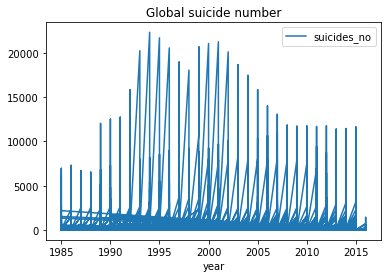

In [11]:
data.plot(kind='line', x='year', y='suicides_no')
# plt.xticks(rotation=90) # can change x axis's labels to vertical 
plt.title('Global suicide number')
plt.show()


We can see that suicides number got max reach in 1994-1995.

# 2. Suicide by Sex

 We will use pie chart for showing suicides rate by sex.

male      13910
female    13910
Name: sex, dtype: int64


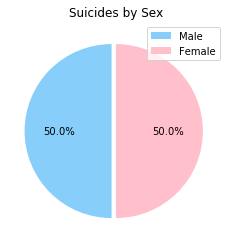

In [12]:
labels = 'Male', 'Female'
sizes = data.sex.value_counts()
print(sizes)
explode = (0.05, 0)
colors = ['lightskyblue', 'pink']
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)  # with startangle we turned chart 90
plt.title('Suicides by Sex')
plt.legend(labels, loc='upper right')
plt.show()


# 3.Suicides in Female & Male by years

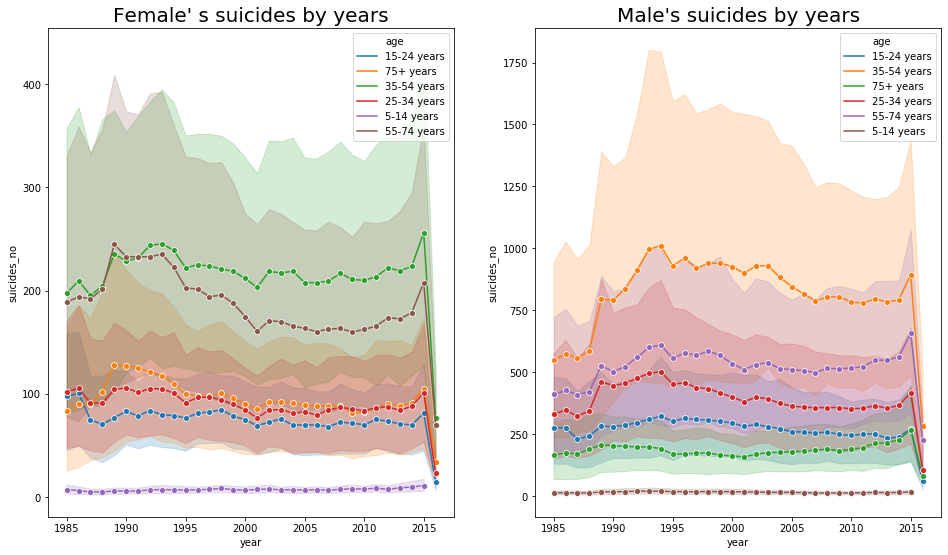

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
dataFemale = data[(data.sex == 'female')]
dataMale = data[(data.sex == 'male')]
# with hue='age'; we grouped data by age
sns.lineplot(x='year', y='suicides_no', hue='age', color='pink', data=dataFemale, ax=ax[0], marker="o").set_title(
    "Female' s suicides by years", fontsize=20)
sns.lineplot(x='year', y='suicides_no', hue='age', color='lightskyblue', data=dataMale, ax=ax[1], marker="o").set_title(
    "Male's suicides by years", fontsize=20)
fig.show()


We can see that suicides number of **Female's** max suicide number got reach in **2015** and age-range was **35-54 years** wile **Male's** max suicide number gow reach in **1994-1995** and age-range was **35-54** years. 

# 4.Suicide number in countries

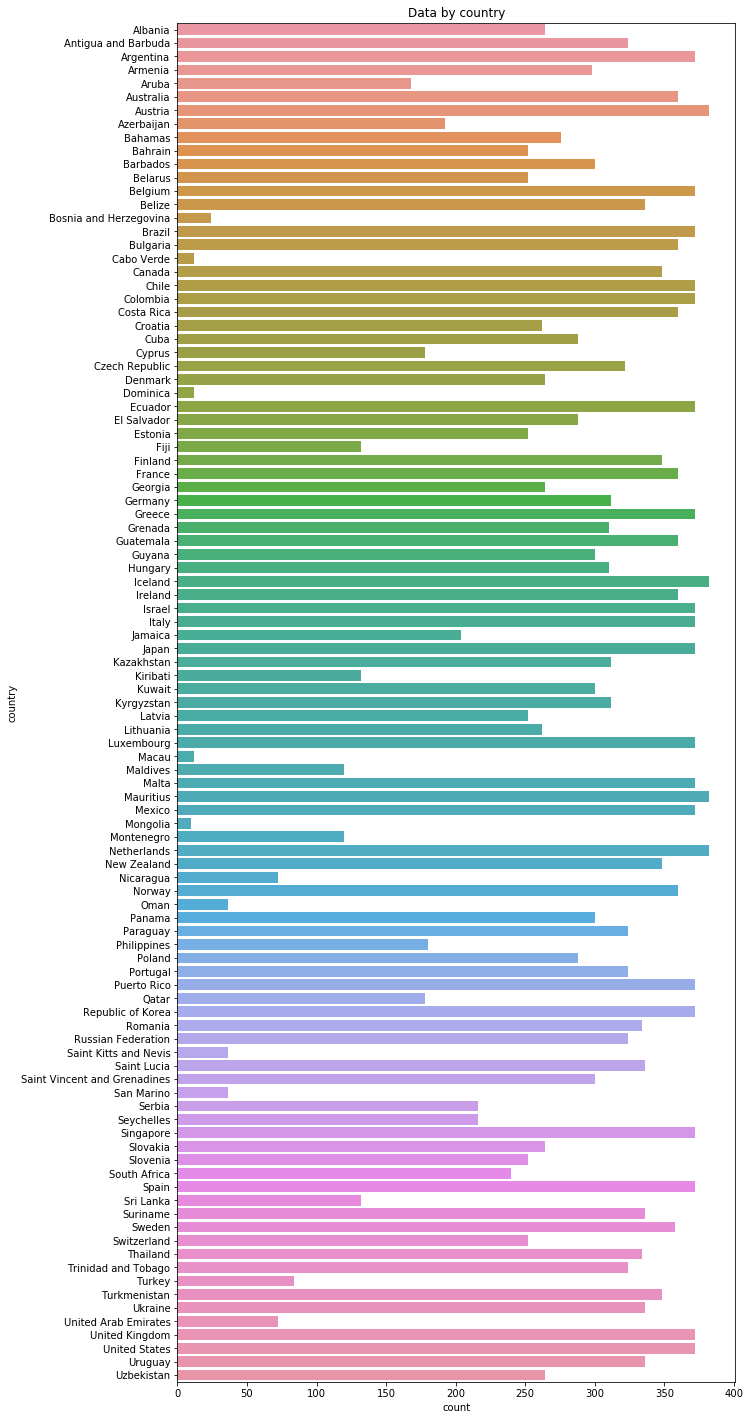

In [14]:
# countplot, show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(10, 25))
sns.countplot(y='country', data=data)
plt.title('Data by country')
plt.show()


# 5.Tidy Data

In [15]:
melted = pd.melt(frame=data, id_vars='country', value_vars=['suicides_no'])
melted


,country,variable,value
0,Albania,suicides_no,21
1,Albania,suicides_no,16
2,Albania,suicides_no,14
3,Albania,suicides_no,1
4,Albania,suicides_no,9
...,...,...,...
27815,Uzbekistan,suicides_no,107
27816,Uzbekistan,suicides_no,9
27817,Uzbekistan,suicides_no,60
27818,Uzbekistan,suicides_no,44


# 6.Concatenating Data

In [16]:
# lets create 2 data frame
data1 = data.head()
data2 = data.tail()
concatData = pd.concat([data1, data2], axis=0, ignore_index=True)  # axis=0, we add row to each other
concatData


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,hdi_for_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
6,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
7,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
8,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
9,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [17]:
# We can also add column to each other
data1 = data['year'].head()
data2 = data['suicides_no'].head()
concatData = pd.concat([data1, data2], axis=1)
concatData


,year,suicides_no
0,1987,21
1,1987,16
2,1987,14
3,1987,1
4,1987,9
